# Get features

In [12]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join('..')))

from data_experts.analyst import Analyst

In [13]:
import seaborn as sns

In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv("../data/electronics_features_to_analyze.csv").drop("Unnamed: 0", axis = 1)

# df general info and structure

In [4]:
df.head()

,discount,buying_mode,query,installment_quantity,installment_rate,has_msi,msi,days_until_discount_end,condition,brand,free_shipping,store_pick_up,domain_id,is_official_store,listing_type_id
0,0.000000,buy_it_now,televisor%204k,6,0.0,True,6,0,new,Samsung,True,False,MLA-TELEVISIONS,False,gold_pro
1,0.000000,buy_it_now,televisor%204k,9,0.0,True,9,0,new,Philips,True,False,MLA-TELEVISIONS,True,gold_pro
2,36.923105,buy_it_now,televisor%204k,12,0.0,True,12,0,new,Noblex,True,False,MLA-TELEVISIONS,True,gold_pro
3,1.515153,buy_it_now,televisor%204k,6,0.0,True,6,0,new,Samsung,True,False,MLA-TELEVISIONS,True,gold_pro
4,0.000000,buy_it_now,televisor%204k,9,0.0,True,9,0,new,LG,True,False,MLA-TELEVISIONS,False,gold_pro


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   discount                 1976 non-null   float64
 1   buying_mode              1976 non-null   object 
 2   query                    1976 non-null   object 
 3   installment_quantity     1976 non-null   int64  
 4   installment_rate         1976 non-null   float64
 5   has_msi                  1976 non-null   bool   
 6   msi                      1976 non-null   int64  
 7   days_until_discount_end  1976 non-null   int64  
 8   condition                1976 non-null   object 
 9   brand                    1976 non-null   object 
 10  free_shipping            1976 non-null   bool   
 11  store_pick_up            1976 non-null   bool   
 12  domain_id                1976 non-null   object 
 13  is_official_store        1976 non-null   bool   
 14  listing_type_id         

In [6]:
df.describe(include='all')

,discount,buying_mode,query,installment_quantity,installment_rate,has_msi,msi,days_until_discount_end,condition,brand,free_shipping,store_pick_up,domain_id,is_official_store,listing_type_id
count,1976.000000,1976,1976,1976.000000,1976.000000,1976,1976.000000,1976.000000,1976,1976,1976,1976,1976,1976,1976
unique,NaN,1,40,NaN,NaN,2,NaN,NaN,2,441,2,1,60,2,3
top,NaN,buy_it_now,televisor%204k,NaN,NaN,False,NaN,NaN,new,Samsung,True,False,MLA-HEADPHONES,False,gold_special
freq,NaN,1976,50,NaN,NaN,1223,NaN,NaN,1949,110,1525,1976,199,1493,1210
mean,8.592530,NaN,NaN,6.159919,21.540051,NaN,3.136134,2.961538,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.243012,NaN,NaN,2.173892,18.280204,NaN,3.416444,7.759651,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,1.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,NaN,NaN,6.000000,0.000000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,NaN,NaN,6.000000,37.930000,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13.072304,NaN,NaN,6.000000,37.930000,NaN,6.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

discount                   0
buying_mode                0
query                      0
installment_quantity       0
installment_rate           0
has_msi                    0
msi                        0
days_until_discount_end    0
condition                  0
brand                      0
free_shipping              0
store_pick_up              0
domain_id                  0
is_official_store          0
listing_type_id            0
dtype: int64

# Features vs target

/Users/deni/anaconda3/envs/xochitl2/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


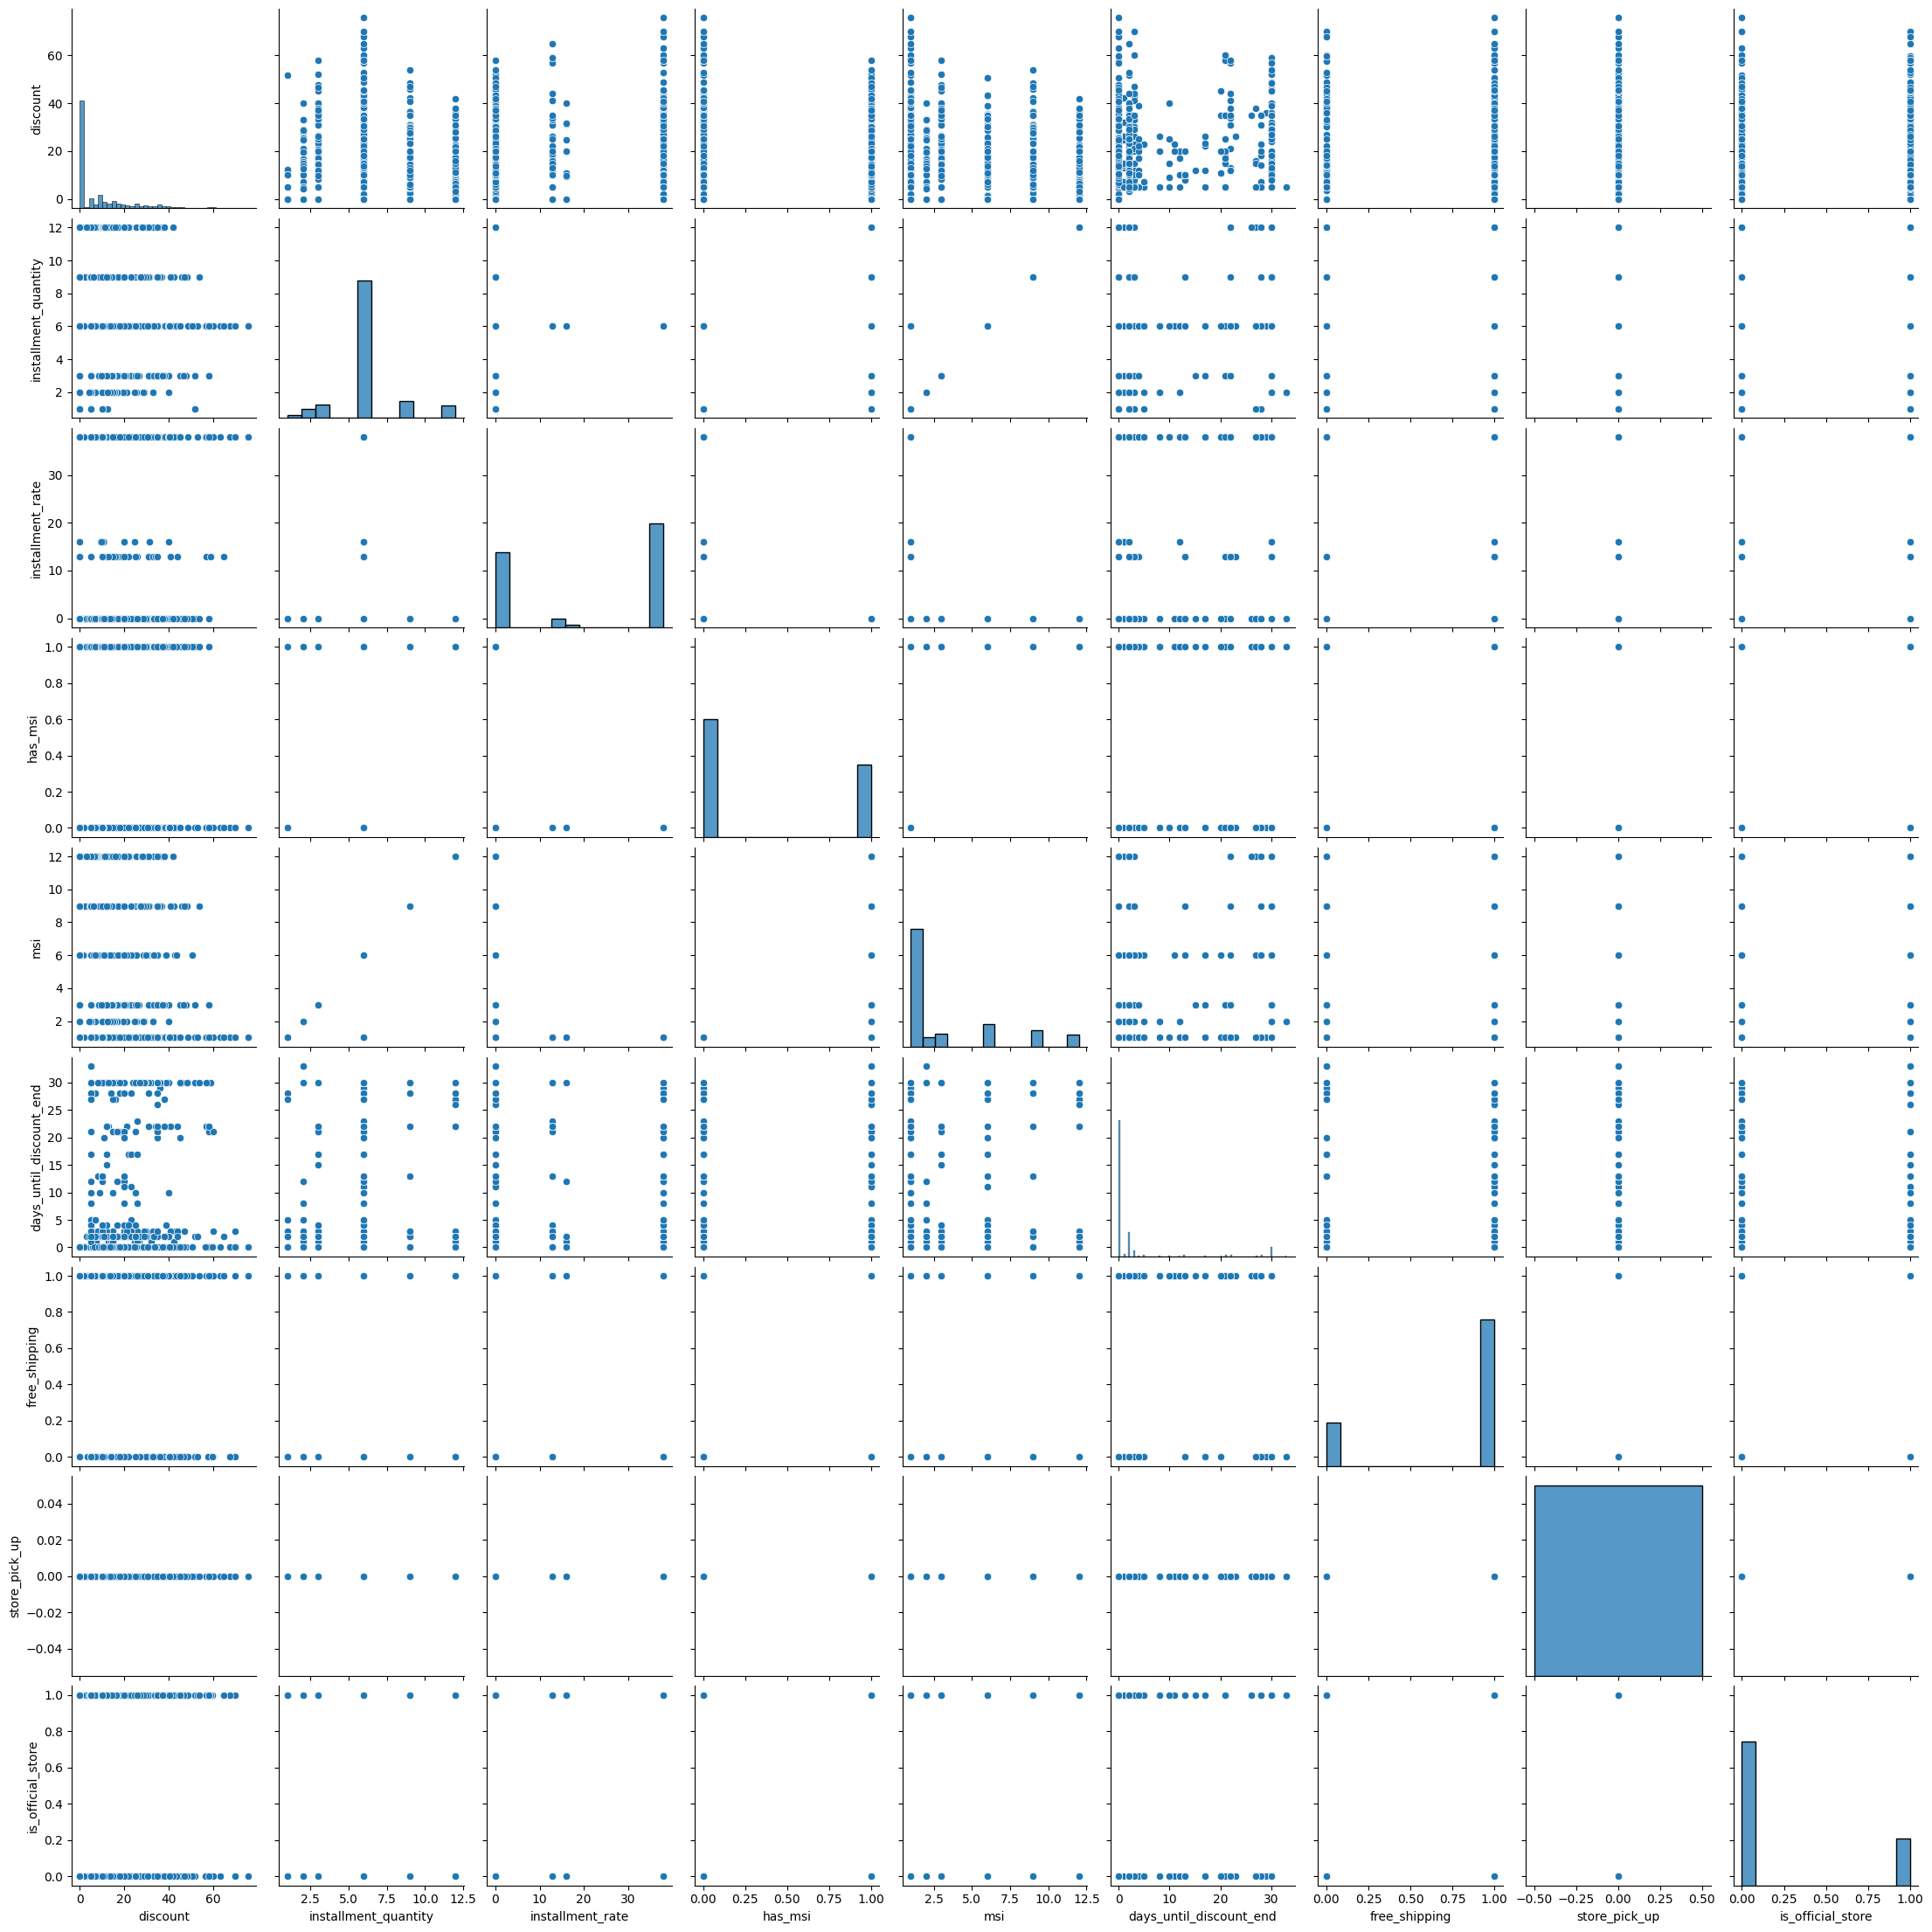

In [8]:
sns.pairplot(df)


# Group by features

In [8]:
analyst = analyst = Analyst(df)


In [14]:
df.columns

Index(['discount', 'buying_mode', 'installment_quantity', 'has_msi',
       'days_until_discount_end', 'brand', 'free_shipping', 'store_pick_up',
       'is_official_store', 'listing_type_id'],
      dtype='object')

In [15]:
result = analyst.analyze_by_features(['query', "days_until_discount_end"]).unstack()
result

discount             \
days_until_discount_end                               0          1    
query                                                                 
adaptador%20bluetooth                           1.455341        NaN   
audifonos%20con%20cancelacion%20de%20ruido      8.248688        NaN   
audifonos%20gaming                              3.068882        NaN   
audifonos%20inalambricos                       16.068617        NaN   
auriculares%20inalambricos                     16.068617        NaN   
barra%20de%20sonido%20dolby%20atmos             0.000000        NaN   
bocina%20bluetooth                              0.701472   5.000000   
camara%20de%20seguridad%20para%20el%20hogar     4.684984        NaN   
camara%20reflex                                 0.000000        NaN   
camara%20sin%20espejo                           0.000000        NaN   
cargador%20inalambrico                          2.102285        NaN   
cargador%20portatil                             2.576334   5.000000   
consola%20de%20videojuegos                      0.350564        NaN   
disco%20duro%20externo                          3.302441  13.995155   
dispositivo%20inteligente%20para%20el%20hogar   4.725087        NaN   
focos%20inteligentes                            6.429096        NaN   
funda%20para%20tablet                           4.400462        NaN   
gafas%20de%20realidad%20virtual                 0.000000        NaN   
laptop%20gaming                                 6.522581        NaN   
monitor%20curvo                                10.065059        NaN   
monitor%20gaming                                5.794908        NaN   
mouse%20inalambrico                             0.356693  18.612266   
patineta%20electrica                            0.000000        NaN   
pc%20de%20escritorio                            3.400798        NaN   
proyector%20para%20cine%20en%20casa             0.000000        NaN   
pulsera%20fitness                               0.000000        NaN   
refrigerador%20inteligente                      1.047341        NaN   
reloj%20inteligente                            19.747587        NaN   
robot%20aspiradora                             13.604656        NaN   
router%20wifi                                   2.231760        NaN   
silla%20gamer                                  26.730340  20.700000   
sistema%20de%20teatro%20en%20casa               3.797991        NaN   
smart%20tv                                      7.784507   7.352946   
smartphone%20android                            1.573777        NaN   
ssd%20portatil                                  1.671718        NaN   
tablet%20android                                9.679191  34.487520   
tarjeta%20grafica                               2.166243        NaN   
teclado%20gaming                                1.472201        NaN   
televisor%204k                                  7.769480  15.992536   
timbre%20inteligente                            0.511118        NaN   

                                                                     \
days_until_discount_end                               2          3    
query                                                                 
adaptador%20bluetooth                          25.591630  20.000087   
audifonos%20con%20cancelacion%20de%20ruido     22.698206  20.000000   
audifonos%20gaming                             15.135128  30.750730   
audifonos%20inalambricos                       16.845328        NaN   
auriculares%20inalambricos                     16.845328        NaN   
barra%20de%20sonido%20dolby%20atmos                  NaN        NaN   
bocina%20bluetooth                             23.513129        NaN   
camara%20de%20seguridad%20para%20el%20hogar    15.666772  41.000000   
camara%20reflex                                      NaN        NaN   
camara%20sin%20espejo                                NaN        NaN   
cargador%20inalambrico                         15.538359        NaN   


<Axes: xlabel='None-days_until_discount_end', ylabel='query'>

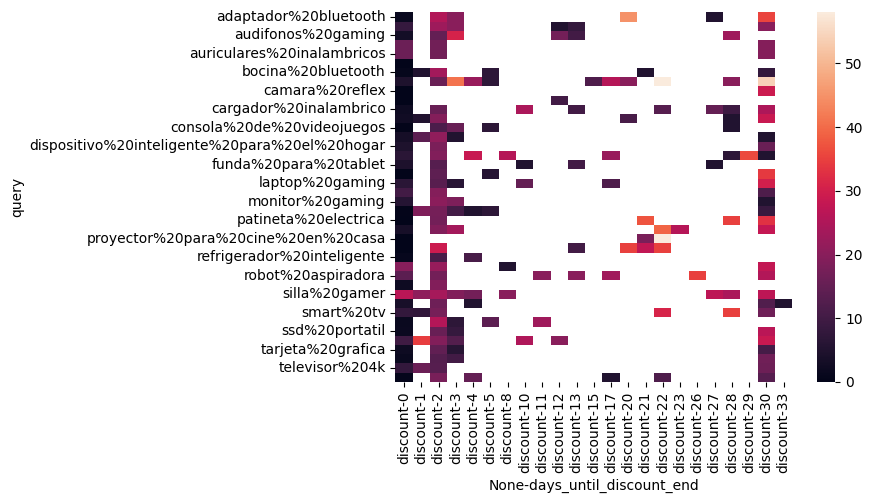

In [16]:
sns.heatmap(result)

In [18]:
df.columns

Index(['discount', 'buying_mode', 'installment_quantity', 'installment_rate',
       'has_msi', 'msi', 'days_until_discount_end', 'condition', 'brand',
       'free_shipping', 'store_pick_up', 'domain_id', 'is_official_store',
       'listing_type_id'],
      dtype='object')

In [17]:
result = analyst.analyze_by_features(['buying_mode', "days_until_discount_end"]).unstack()
result

discount                                             \
days_until_discount_end        0         1          2          3          4    
buying_mode                                                                    
buy_it_now               4.498802  18.02139  18.211489  15.082844  16.909095   

                                                                               \
days_until_discount_end       5     8     10        11    12         13    15   
buying_mode                                                                     
buy_it_now               7.66668  12.2  18.8  21.50008  13.0  10.500007  12.0   

                                                                       \
days_until_discount_end         17     20         21         22    23   
buying_mode                                                             
buy_it_now               17.636138  27.75  32.699934  30.882353  26.0   

                                                                            \
days_until_discount_end         26     27         28         29         30   
buying_mode                                                                  
buy_it_now               35.000002  11.75  20.615673  36.040044  21.817933   

                              
days_until_discount_end   33  
buying_mode                   
buy_it_now               5.0

In [18]:
result = analyst.analyze_by_features(['msi', "days_until_discount_end"]).unstack()
result

discount                                   \
days_until_discount_end         0          1          2          3    
msi                                                                   
1                         3.223829  20.231381  19.784265  16.642935   
2                        10.391865  14.035649  10.799966   5.000000   
3                         5.767993  26.667022  20.831941   5.000001   
6                         4.364879   5.100034  19.100193  10.250000   
9                         5.882995        NaN  13.338930  18.131275   
12                        9.438336   7.352946  11.167933   5.000000   

                                                                     \
days_until_discount_end         4          5     8     10        11   
msi                                                                   
1                        19.250001   6.333333  23.0  18.8       NaN   
2                              NaN   7.000000   5.0   NaN       NaN   
3                        13.500016        NaN   NaN   NaN       NaN   
6                         5.000000  14.000080   NaN   NaN  21.50008   
9                              NaN        NaN   NaN   NaN       NaN   
12                             NaN        NaN   NaN   NaN       NaN   

                                                                          \
days_until_discount_end         12        13    15         17         20   
msi                                                                        
1                        15.666667   9.85715   NaN  13.000000  30.333333   
2                         5.000000       NaN   NaN        NaN        NaN   
3                              NaN       NaN  12.0  26.000000        NaN   
6                              NaN  10.00000   NaN  23.180692  20.000000   
9                              NaN  20.00000   NaN        NaN        NaN   
12                             NaN       NaN   NaN        NaN        NaN   

                                                                      \
days_until_discount_end         21         22    23         26    27   
msi                                                                    
1                        34.058746  34.100000  26.0        NaN   5.0   
2                              NaN        NaN   NaN        NaN   NaN   
3                        25.000000  33.666667   NaN        NaN   NaN   
6                              NaN  12.000000   NaN        NaN  15.5   
9                              NaN  12.000000   NaN        NaN   NaN   
12                             NaN  29.500000   NaN  35.000002  38.0   

                                                               
days_until_discount_end         28         29         30   33  
msi                                                            
1                        14.999839  36.040044  22.284926  NaN  
2                              NaN        NaN  13.750000  5.0  
3                              NaN        NaN  26.365893  NaN  
6                        31.001307        NaN  19.380955  NaN  
9                        35.001117        NaN  34.260434  NaN  
12                       20.000000        NaN  15.700000  NaN

<Axes: xlabel='None-days_until_discount_end', ylabel='msi'>

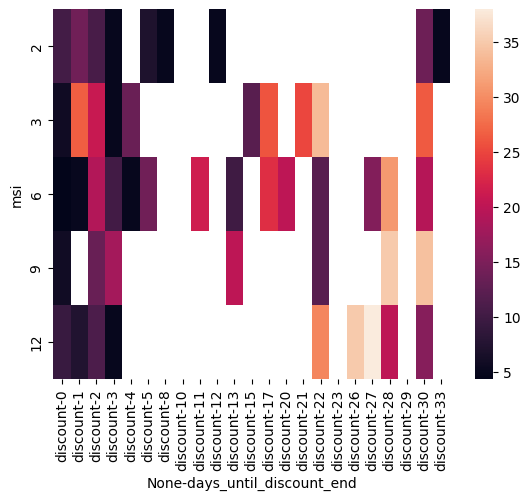

In [20]:
sns.heatmap(result.drop(1))

# Bodega

## Agregar esta lógica a los tests

In [ ]:
#agregar a tests
df0[["discount", "days_until_discount_end"]]

In [7]:
#esto se debe poner en los tests
df0[["installments", "has_msi", "installment_rate", "installment_quantity"]]

,installments,has_msi,installment_rate,installment_quantity
0,"{'quantity': 6, 'amount': 7977.46, 'rate': 37....",False,37.93,6
1,"{'quantity': 6, 'amount': 2634.23, 'rate': 37....",False,37.93,6
2,"{'quantity': 6, 'amount': 1116.77, 'rate': 12....",False,12.95,6
3,"{'quantity': 6, 'amount': 9499.84, 'rate': 0, ...",True,0.00,6
4,"{'quantity': 12, 'amount': 6628.25, 'rate': 0,...",True,0.00,12
5,"{'quantity': 6, 'amount': 11493.94, 'rate': 37...",False,37.93,6
6,"{'quantity': 6, 'amount': 2267.49, 'rate': 12....",False,12.95,6
7,"{'quantity': 6, 'amount': 22821.44, 'rate': 37...",False,37.93,6
8,"{'quantity': 6, 'amount': 2068.06, 'rate': 12....",False,12.95,6
9,"{'quantity': 6, 'amount': 7724.08, 'rate': 37....",False,37.93,6
